# Simple regression #

We are going to do a simple regression with the Funda dataset.

In [1]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('funda.csv')
df.head()

,id,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


We start were we left of with the previous exercise. We remove the rows with no price information and also houses with an area smaller than 10m2.

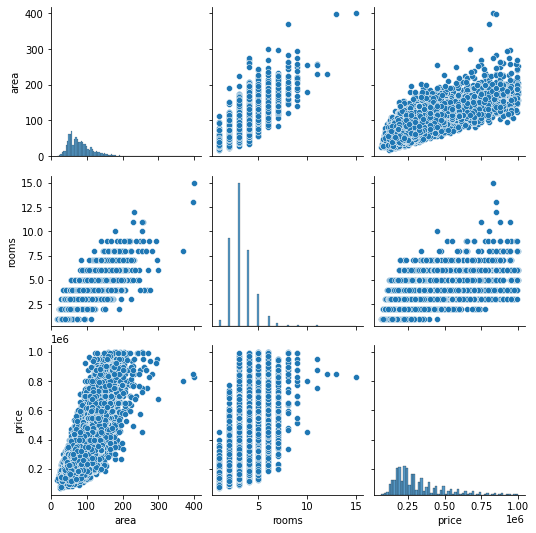

In [3]:
df = df[(df['price'] > 30000) & (df['area'] > 10)] #we want to subset the original dataset, otherwise we lose data
df_sel = df[['area', 'rooms', 'price']]

sns.pairplot(df_sel)
plt.show()

## Simple linear regression ##

Let's do a simple linear regression. Area is our independent variable (X), because the price (Y) depends on the area.

In [4]:
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn

x = df_sel[['area']] #to use sk-learn, we need to create lists of the two variables
y = df_sel['price']

lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model

b0 = lm.intercept_ #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
b1 = lm.coef_[0] #gets the intercept

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X") #.0f formats to 2 decimals.

The regression line is equal to y = 27983.93 + 3498.81X


Or, in Markdown: 

$y= 27983.93 + 3498.81x$

where *x* is price in euros and *y* is area in squared meters

1. We can now use the lm.predict method to make predictions for different values of x. <b>Predict now the price for 70m2 using lm.predict.</b>

2. Let's print this prettier using: <i>print(f"some text {lm.predict([[70]])} euros")

3. Create a new variable price_p and predict all prices for every case using <i>lm.predict(x)</i>

4. Next print the real price, predicted price and residual for the house on Slichthenhorststraat 10. 

5. Now add the residuals for all houses to the dataframe: